In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, math, random

In [3]:
np.set_printoptions(linewidth=400)

In [4]:
data = pd.read_table('qws2.CSV', header=None, delimiter=',')

pd_data = data.iloc[1:, 0:9]
type(pd_data)

pandas.core.frame.DataFrame

In [5]:
item_size = pd_data.shape[0]

feature_dimension = pd_data.shape[1]

max_length = 10

epsilon = 1E-10

In [6]:
scores = np.exp(0.01 * np.random.randn(item_size) + 0.2) #mu=0.2, sigma=0.01 的正态分布
print('scores:', scores)

scores: [1.24080462 1.21714253 1.21060664 ... 1.22467247 1.22302828 1.19505659]


/home/lijiecn/anaconda3/envs/dpp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lijiecn/anaconda3/envs/dpp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lijiecn/anaconda3/envs/dpp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lijiecn/anaconda3/envs/dpp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lijiecn/anaconda3/envs/dpp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 390

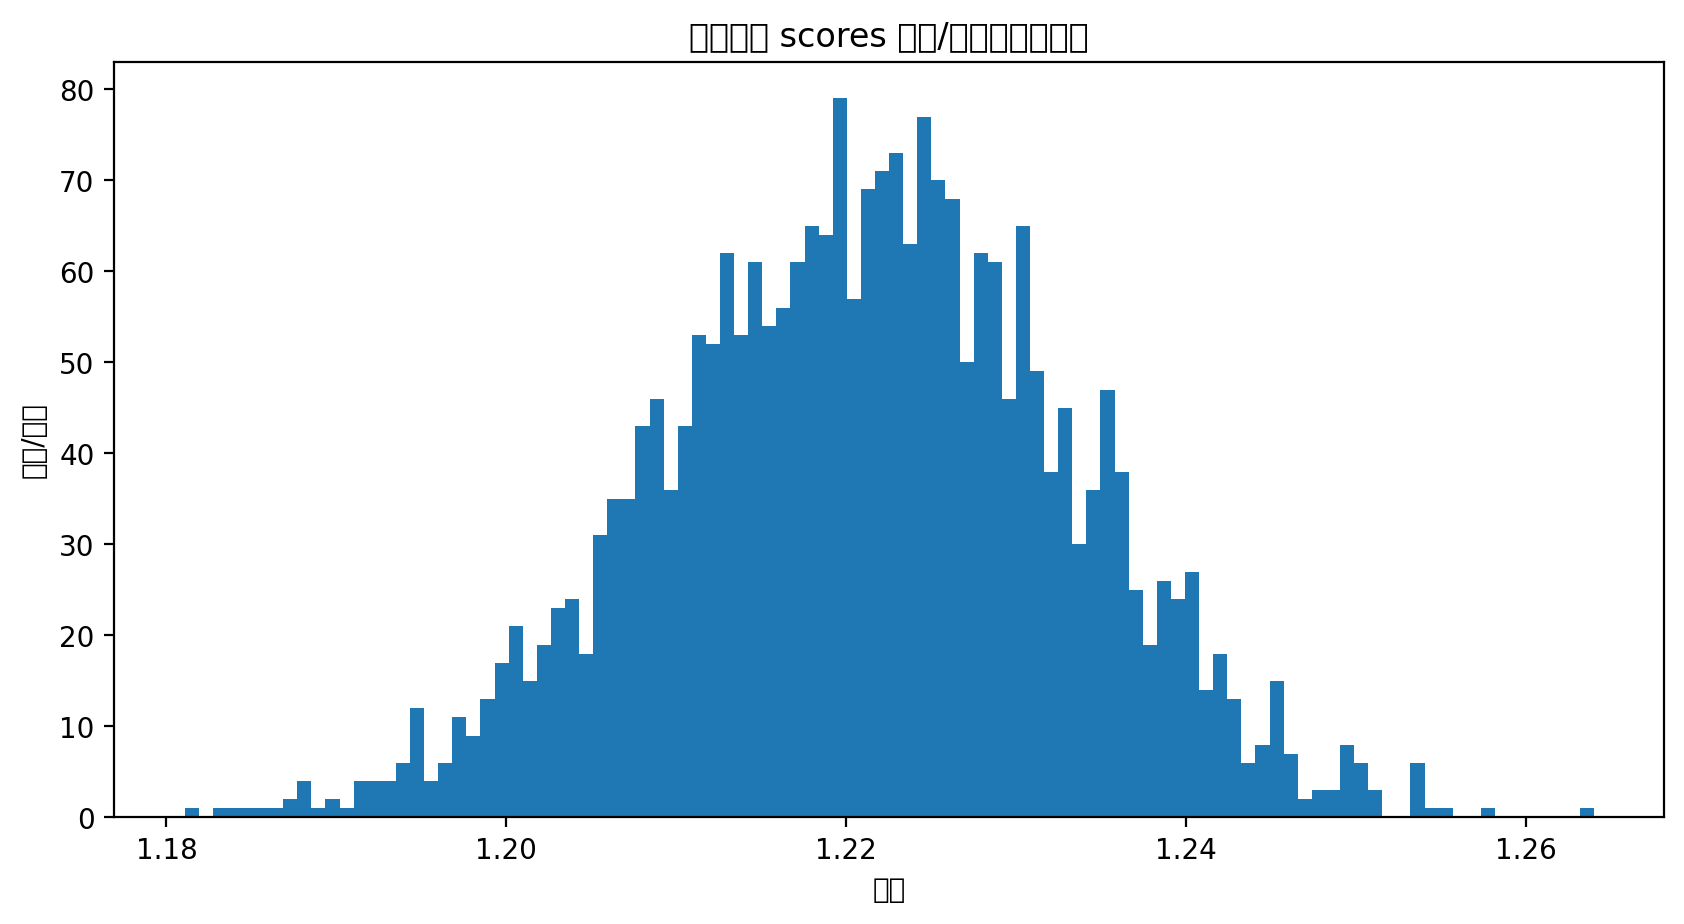

In [7]:
# item_data_x = np.linspace(-100,100,1000)
# item_data_y = np
# 0.01 * np.random.randn(item_size) + 0.2
a = scores
plt.figure(figsize=(10,5), dpi=200)
plt.hist(a,100)# 画直方图
plt.xlabel("区间")
plt.ylabel("频数/频率")
plt.title("随机生成 scores 频数/频率分布直方图")
plt.show()

In [8]:
feature_vectors = pd_data.loc[:,:].values.astype(float)

print(type(feature_vectors))
print(feature_vectors)

<class 'numpy.ndarray'>
[[3.0275e+02 8.9000e+01 7.1000e+00 ... 8.0000e+01 1.8775e+02 3.2000e+01]
 [4.8200e+02 8.5000e+01 1.6000e+01 ... 8.4000e+01 1.0000e+00 2.0000e+00]
 [3.3214e+03 8.9000e+01 1.4000e+00 ... 8.0000e+01 2.6000e+00 9.6000e+01]
 ...
 [9.3930e+01 8.0000e+01 2.1000e+00 ... 8.2000e+01 3.7200e+00 6.0000e+01]
 [1.0675e+02 8.6000e+01 1.3000e+00 ... 8.7000e+01 1.2500e+00 9.6000e+01]
 [3.1650e+02 7.2000e+01 1.5900e+01 ... 8.7000e+01 5.5000e+00 8.0000e+00]]


In [9]:
feature_vectors = feature_vectors / np.linalg.norm(feature_vectors, axis=1, keepdims=True)
print('l2_norm_feature_vectors:', feature_vectors, sep='\n')

l2_norm_feature_vectors:
[[7.52615874e-01 2.21247937e-01 1.76501163e-02 ... 1.98874550e-01 4.66733709e-01 7.95498199e-02]
 [9.25520798e-01 1.63214249e-01 3.07226821e-02 ... 1.61294081e-01 1.92016763e-03 3.84033526e-03]
 [9.98003821e-01 2.67424399e-02 4.20667595e-04 ... 2.40381483e-02 7.81239819e-04 2.88457779e-02]
 ...
 [4.55423370e-01 3.87883207e-01 1.01819342e-02 ... 3.97580287e-01 1.80365691e-02 2.90912405e-01]
 [4.46778607e-01 3.59934053e-01 5.44086360e-03 ... 3.64119333e-01 5.23159961e-03 4.01786850e-01]
 [8.68583913e-01 1.97592549e-01 4.36350212e-02 ... 2.38757663e-01 1.50938753e-02 2.19547277e-02]]


In [10]:
similarities = np.dot(feature_vectors, feature_vectors.T)
print('similarities:', similarities, sep='\n')

similarities:
[[1.         0.86997638 0.77945642 ... 0.75845166 0.73581933 0.88588136]
 [0.86997638 1.         0.94487737 ... 0.73931327 0.71484563 0.98982433]
 [0.77945642 0.94487737 1.         ... 0.51003225 0.50232576 0.8947768 ]
 ...
 [0.75845166 0.73931327 0.51003225 ... 1.         0.9913373  0.81457884]
 [0.73581933 0.71484563 0.50232576 ... 0.9913373  1.         0.78706589]
 [0.88588136 0.98982433 0.8947768  ... 0.81457884 0.78706589 1.        ]]


In [11]:
kernel_matrix = scores.reshape((item_size, 1)) * similarities * scores.reshape((1, item_size))
print('reshaped score:', scores.reshape((item_size, 1)) * scores.reshape((1, item_size)), sep='\n')

reshaped score:
[[1.53959611 1.51023608 1.50212631 ... 1.51957926 1.51753914 1.48283174]
 [1.51023608 1.48143594 1.47348083 ... 1.49060095 1.48859973 1.4545542 ]
 [1.50212631 1.47348083 1.46556843 ... 1.48259662 1.48060615 1.44674344]
 ...
 [1.51957926 1.49060095 1.48259662 ... 1.49982266 1.49780906 1.46355291]
 [1.51753914 1.48859973 1.48060615 ... 1.49780906 1.49579816 1.461588  ]
 [1.48283174 1.4545542  1.44674344 ... 1.46355291 1.461588   1.42816026]]


In [12]:
print('kernel_matrix:', kernel_matrix, sep='\n')

kernel_matrix:
[[1.53959611 1.31386971 1.170842   ... 1.15252741 1.11663462 1.313613  ]
 [1.31386971 1.48143594 1.39225868 ... 1.10202106 1.06411902 1.43975314]
 [1.170842   1.39225868 1.46556843 ... 0.7561721  0.74374661 1.29451247]
 ...
 [1.15252741 1.10202106 0.7561721  ... 1.49982266 1.48483399 1.19217923]
 [1.11663462 1.06411902 0.74374661 ... 1.48483399 1.49579816 1.15036606]
 [1.313613   1.43975314 1.29451247 ... 1.19217923 1.15036606 1.42816026]]


In [13]:
cis = np.zeros((max_length, item_size))
di2s = np.copy(np.diag(kernel_matrix))
selected_items = list()
selected_item = np.argmax(di2s)
selected_items.append(selected_item)

while len(selected_items) < max_length:
    k = len(selected_items) - 1
    ci_optimal = cis[:k, selected_item]
    di_optimal = math.sqrt(di2s[selected_item])
    elements = kernel_matrix[selected_item, :]
    eis = (elements - np.dot(ci_optimal, cis[:k, :])) / di_optimal
    cis[k, :] = eis
    di2s -= np.square(eis)
    di2s[selected_item] = -np.inf
    selected_item = np.argmax(di2s)
    if di2s[selected_item] < epsilon:
        break
    selected_items.append(selected_item)
    
print('scores:', scores)
print('selected_items_index:', selected_items)
print("selected_items_value:", scores[selected_items])


scores: [1.24080462 1.21714253 1.21060664 ... 1.22467247 1.22302828 1.19505659]
selected_items_index: [1730, 373, 688, 851, 1628, 1329, 2168, 1864, 448]
selected_items_value: [1.26396884 1.23417393 1.25005475 1.22845446 1.22044378 1.23511058 1.2136635  1.22928068 1.20704742]


In [14]:
# 产生十个用户，随机挑选5-15个item，作为服务调用历史记录
# 并选择其中的一个服务作为约束条件，也就是参考服务

In [15]:
class User:
    call_num = np.random.randint(5, 15 + 1) # [low, hight + 1)
    call_history = np.random.choice(item_size, call_num, replace=False) # 从item_size中随机挑选call_num个数，不重复
    representative_item_index = call_history[np.random.randint(0, call_num)] # 随机选择一个item作为参考服务
    representative_item = None
    def __init__(self):
        print(f'call_num: {self.call_num}')
        print(f'call_history: {self.call_history}')
        print(f'representative_item: {self.representative_item_index}')
    def set_representative_item(self, item_value):
        self.representative_item = item_value
    def __str__(self):
        return f'call_num: {self.call_num} \ncall_history: {self.call_history} \nrepresentative_item_index: {self.representative_item_index} \nrepresentative_item: {self.representative_item}'


In [16]:
user = User()

call_num: 8
call_history: [1668 1457 1147 1122 2140 1856 1800  203]
representative_item: 2140


In [17]:
user.set_representative_item(pd_data.iloc[user.representative_item_index].values.astype(float))

In [18]:
print(user)

call_num: 8 
call_history: [1668 1457 1147 1122 2140 1856 1800  203] 
representative_item_index: 2140 
representative_item: [62.75 56.    7.8  56.   83.   89.   91.    2.25 10.  ]


In [19]:
similarities # (item_size, item_size)

array([[1.        , 0.86997638, 0.77945642, ..., 0.75845166, 0.73581933, 0.88588136],
       [0.86997638, 1.        , 0.94487737, ..., 0.73931327, 0.71484563, 0.98982433],
       [0.77945642, 0.94487737, 1.        , ..., 0.51003225, 0.50232576, 0.8947768 ],
       ...,
       [0.75845166, 0.73931327, 0.51003225, ..., 1.        , 0.9913373 , 0.81457884],
       [0.73581933, 0.71484563, 0.50232576, ..., 0.9913373 , 1.        , 0.78706589],
       [0.88588136, 0.98982433, 0.8947768 , ..., 0.81457884, 0.78706589, 1.        ]])

In [20]:
scores

array([1.24080462, 1.21714253, 1.21060664, ..., 1.22467247, 1.22302828, 1.19505659])

In [21]:
# 选择了一个参考服务，每个服务和参考服务的相似度就是该服务的分数
print(f"rep item index: {user.representative_item_index}")

rep item index: 2140


In [22]:
# 现在需要得到一个item——size维度的向量，表示每个服务与参考服务的相似度，作为得分
similarities_with_rep = similarities[user.representative_item_index]
similarities_with_rep[user.representative_item_index] # 参考服务与自身的相似度为1，丢失精度

1.0

In [23]:
scores = np.exp(0.01 * similarities_with_rep + 0.2)
scores
# 现在得到了用户隐含的对于每个item的评分，需要根据此来生成推荐列表

array([1.22974655, 1.22951597, 1.22622776, ..., 1.23293058, 1.23243585, 1.23071284])

In [24]:
kernel_matrix = scores.reshape((item_size, 1)) * similarities * scores.reshape((1, item_size))
print('reshaped score:', scores.reshape((item_size, 1)) * scores.reshape((1, item_size)), sep='\n')

reshaped score:
[[1.51227658 1.51199302 1.50794935 ... 1.51619213 1.51558373 1.51346487]
 [1.51199302 1.51170951 1.5076666  ... 1.51590784 1.51529955 1.51318109]
 [1.50794935 1.5076666  1.50363451 ... 1.5118537  1.51124704 1.50913425]
 ...
 [1.51619213 1.51590784 1.5118537  ... 1.52011783 1.51950785 1.5173835 ]
 [1.51558373 1.51529955 1.51124704 ... 1.51950785 1.51889812 1.51677463]
 [1.51346487 1.51318109 1.50913425 ... 1.5173835  1.51677463 1.5146541 ]]


In [25]:
print('kernel_matrix:', kernel_matrix, sep='\n')

kernel_matrix:
[[1.51227658 1.31539821 1.17538081 ... 1.14995844 1.1151958  1.34075032]
 [1.31539821 1.51170951 1.42456005 ... 1.12073078 1.08320527 1.49778345]
 [1.17538081 1.42456005 1.50363451 ... 0.77109415 0.75913832 1.35033831]
 ...
 [1.14995844 1.12073078 0.77109415 ... 1.52011783 1.50634481 1.2360285 ]
 [1.1151958  1.08320527 0.75913832 ... 1.50634481 1.51889812 1.19380157]
 [1.34075032 1.49778345 1.35033831 ... 1.2360285  1.19380157 1.5146541 ]]


In [26]:
cis = np.zeros((max_length, item_size))
di2s = np.copy(np.diag(kernel_matrix))
selected_items = list()
selected_item = np.argmax(di2s)
selected_items.append(selected_item)

while len(selected_items) < max_length:
    k = len(selected_items) - 1
    ci_optimal = cis[:k, selected_item]
    di_optimal = math.sqrt(di2s[selected_item])
    elements = kernel_matrix[selected_item, :]
    eis = (elements - np.dot(ci_optimal, cis[:k, :])) / di_optimal
    cis[k, :] = eis
    di2s -= np.square(eis)
    di2s[selected_item] = -np.inf
    selected_item = np.argmax(di2s)
    if di2s[selected_item] < epsilon:
        break
    selected_items.append(selected_item)
    
print('scores:', scores)
print('selected_items_index:', selected_items)
print("selected_items_value:", scores[selected_items])

scores: [1.22974655 1.22951597 1.22622776 ... 1.23293058 1.23243585 1.23071284]
selected_items_index: [2140, 373, 2064, 1070, 2305, 1545, 413, 950, 1847]
selected_items_value: [1.23367806 1.22487309 1.22604784 1.23037427 1.23187632 1.23267851 1.23288197 1.23303855 1.23300812]


In [27]:
# 如上得到的是user的推荐结果列表，该方法认为每个用户具有相同的多样性偏好
# 有的用户调用了3个不同的服务，有的用户调用了30个不同的服务，这两者的多样性偏好显然是不同的
# 我们需要根据用户的服务调用历史记录来计算用户的多样性偏好

In [28]:
# 如何评价推荐结果的准确度
# 如上我们选择出了推荐列表，计算他们与参考服务的相似度，然后计算推荐列表的平均相似度
print(f"user.representative_item_index: {user.representative_item_index}")
print(f"user.representative_item_value: {pd_data.iloc[user.representative_item_index].values.astype(float)}")
print(f"selected_items_index: {selected_items}")
print(f"selected_items_value:\n {pd_data.iloc[[index for index in selected_items],:].values.astype(float)}")


user.representative_item_index: 2140
user.representative_item_value: [62.75 56.    7.8  56.   83.   89.   91.    2.25 10.  ]
selected_items_index: [2140, 373, 2064, 1070, 2305, 1545, 413, 950, 1847]
selected_items_value:
 [[6.27500e+01 5.60000e+01 7.80000e+00 5.60000e+01 8.30000e+01 8.90000e+01 9.10000e+01 2.25000e+00 1.00000e+01]
 [4.63761e+03 3.00000e+01 5.00000e-01 3.00000e+01 6.70000e+01 6.70000e+01 8.20000e+01 4.14035e+03 8.00000e+00]
 [3.28800e+03 1.80000e+01 1.30000e+00 1.90000e+01 6.70000e+01 8.90000e+01 7.20000e+01 2.96000e+00 7.00000e+00]
 [1.29000e+02 1.30000e+01 8.90000e+00 1.40000e+01 3.30000e+01 7.80000e+01 5.90000e+01 8.39000e+00 9.50000e+01]
 [7.68800e+01 9.20000e+01 1.74000e+01 9.70000e+01 6.00000e+01 8.90000e+01 5.40000e+01 2.64700e+01 9.60000e+01]
 [1.07830e+02 7.30000e+01 8.50000e+00 7.30000e+01 8.30000e+01 5.00000e+01 9.10000e+01 2.50000e+00 6.30000e+01]
 [7.60000e+01 9.80000e+01 2.34000e+01 9.90000e+01 5.00000e+01 8.90000e+01 7.70000e+01 2.00000e+00 5.00000e+00]
 

In [29]:
[index for index in selected_items]

[2140, 373, 2064, 1070, 2305, 1545, 413, 950, 1847]